In [1]:
# imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,log_loss
import warnings
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [4]:
glass_df = pd.read_csv(r'..\Cases\Glass Identification\Glass.csv')
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [10]:
X, y = glass_df.drop('Type', axis=1), glass_df['Type']
X_train,  X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify=y, random_state=25)
dtc = DecisionTreeClassifier(random_state=25)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_test.shape
y_pred.shape

0.6615384615384615


(65,)

In [11]:
depths = [2,3,4,5,6,None]
scores = []
for d in depths:
    dtc = DecisionTreeClassifier(random_state=25, max_depth=d)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    #print(y_pred.shap)
    scores.append([d, accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame(scores, columns=['depths','acc_score'])
df_scores.sort_values('acc_score', ascending=False)

,depths,acc_score
1,3.0,0.661538
2,4.0,0.661538
5,NaN,0.661538
3,5.0,0.630769
0,2.0,0.615385
4,6.0,0.615385


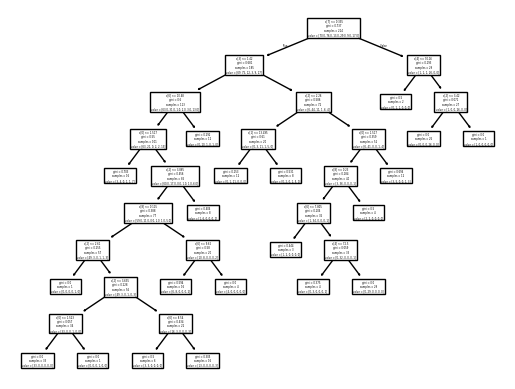

In [17]:
depths = [2,3,4,5,6,None]
min_samples = [2, 10, 20, 50, 75]
min_leaf = [1, 10, 20, 50, 75]

scores = []
for d in depths:
    for l in min_leaf:
        for s in min_samples:
            dtc = DecisionTreeClassifier(random_state=25, max_depth=d, min_samples_split=s , min_samples_leaf=l)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            #print(y_pred.shap)
            scores.append([d, accuracy_score(y_test, y_pred), s, l])
df_scores = pd.DataFrame(scores, columns=['depths','acc_score', 'min_Sample', 'min_leaf'])
df_scores.sort_values('acc_score', ascending=False)
best_tree = DecisionTreeClassifier(random_state=25, max_depth=None, min_samples_split=20 , min_samples_leaf=1)
best_tree.fit(X,y)
df_imp = pd.DataFrame({'Feature' : list(X.columns), 'Importance': list(best_tree.feature_importances_)})
df_imp.columns

df_imp.sort_values('Importance').plot(kind='barh', x='Feature', xlabel='Feature', ylabel='Importance')

from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
plot_tree(best_tree)
plt.show()